# Omicron Sentiment Analysis

###  When the WHO designated a new variant of the coronavirus, *B.1.1.529*, as a variant of concern which has been named Omicron. Right after that, we saw an outbreak of tweets about the Omicron variant on Twitter. I will use Machine Learning to analyse these tweets.

In [1]:
# Importing libraries and dataset (from Kaggle), and view dataset:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

data = pd.read_csv("omicron.csv")
print(data.head())


                    id          user_name    user_location  \
0  1491840066506743820      Nathan Joyner  Los Angeles, CA   
1  1491839660674490371  Gatherer Thompson        Corporate   
2  1491839607368867842      Nathan Joyner  Los Angeles, CA   
3  1491839207169351689      Nathan Joyner  Los Angeles, CA   
4  1491839165608177667    Brownyard Group    Bay Shore, NY   

                                    user_description         user_created  \
0  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
1  I'm with the people who are with everyone. A s...  2009-05-10 23:01:22   
2  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
3  Global Venture Captial and Private Equity/Busi...  2015-05-18 20:52:29   
4  We offer liability coverage for the Security G...  2009-12-08 16:41:53   

   user_followers  user_friends  user_favourites  user_verified  \
0              49            11              803          False   
1             639          193

In [2]:
# Check for null values:

print(data.isnull().sum())

id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64


In [3]:
# The dataset contains null values in three columns that contains textual data, I will remove all the rows containing the null values:

data = data.dropna()

### The text column in the dataset contains the tweets done by people to share their opinions about the Omicron variant. To move further, we need to clean and prepare this column for the task of sentiment analysis

In [4]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword=set(stopwords.words('english'))

def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["text"] = data["text"].apply(clean)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### As we have cleaned the text column, now let’s have a look at the word cloud of the text column to look at the most number of words used by the people on their tweets:

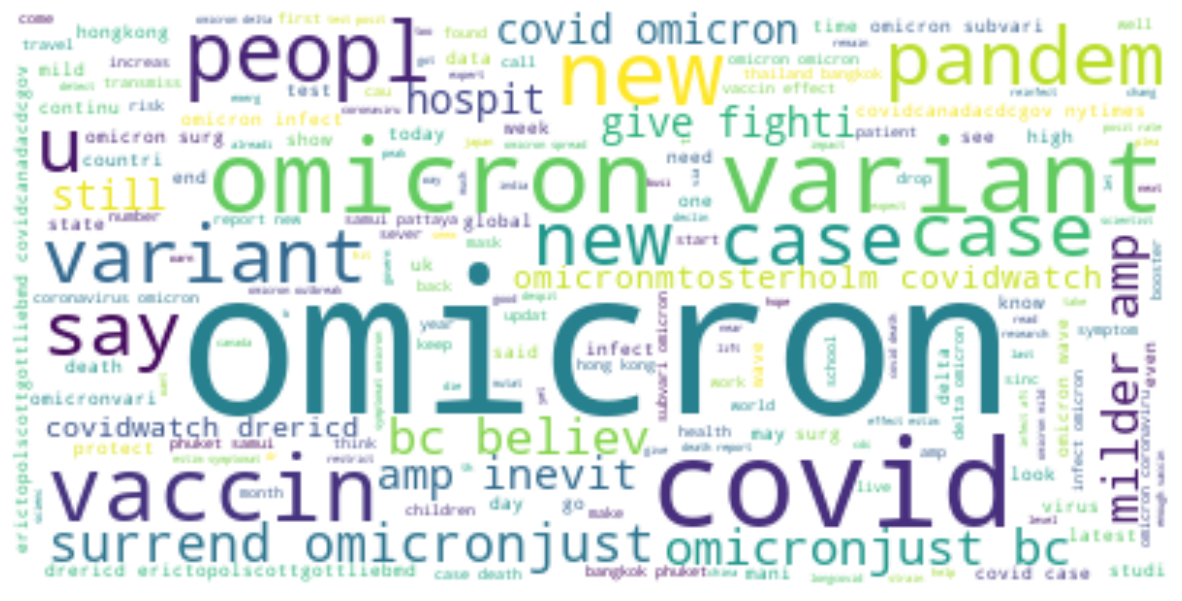

In [5]:
text = " ".join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Now let’s have a look at the word cloud of the hashtags column to look at the most number of hashtags used by the people on their tweets:

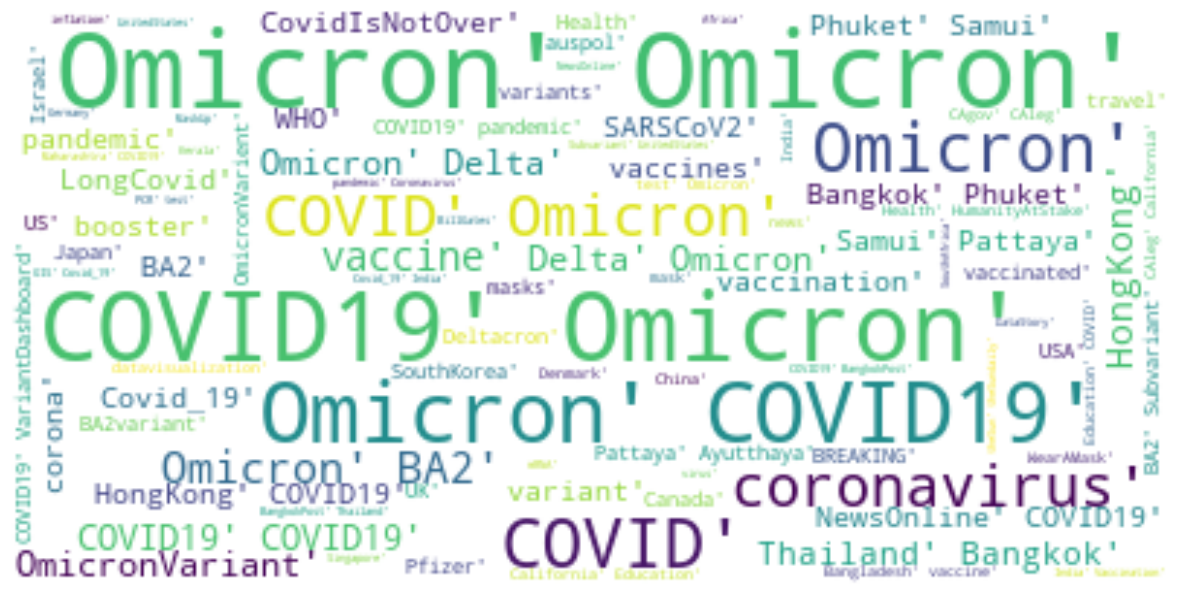

In [6]:
text = " ".join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(15,18))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### Now I will calculate the sentiment scores of the tweets about the Omicron variant. Here I will add three more columns in this dataset as Positive, Negative, and Neutral by calculating the sentiment scores of the text column:

In [7]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["text"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["text"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["text"]]
data = data[["text", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                                 text  Positive  Negative  \
1   yaschamounk cdc say number fulli vaccin omicro...     0.126       0.0   
4    winterolymp alreadi underway us olympian look...     0.000       0.0   
5   doctor help discov omicron say pressur reveal ...     0.213       0.0   
8   month tonga final   singl  doubl tappeda sickn...     0.000       0.0   
11  covid pandem continu ukrain case rapid rise du...     0.000       0.0   

    Neutral  
1     0.874  
4     1.000  
5     0.787  
8     1.000  
11    1.000  


### Now let’s see how most of the people reacted about the Omicron variant:

In [8]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


# So most of the opinions were Neutral, which means that people were sharing information about the Omicron variant instead of sharing any positive or negative opinions.